# Игра в развернутой форме

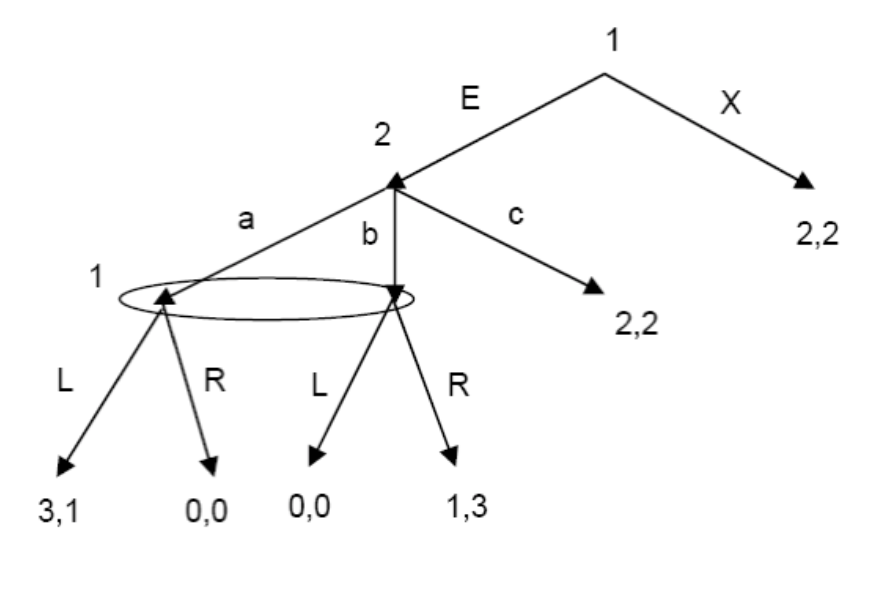

In [4]:
from IPython.display import Image
Image("img/ext_form.png", width=500, height=500)

- Пусть игрок 1 считает, что в вероятностью $p$ игрок 2 сделал ход $a$, а с вероятностью $1 - p$ ход $b$. Тогда выигрыш от хода L: $3 p$, а от хода R: $1 - p$. Таким образом, игрок 1 выбирает ход L при $p > 0.25$, R - при $p < 0.25$ и смешанную стратегию при $p = 0.25$.

- Пусть игрок 1 выбирает ход L с вероятностью $x$ и ход R с вероятностью $1 - x$. Тогда выигрыши игрока два от стратегий a, b, c равны соответственно $x$, $3 (1 - x)$, 2. Получается, что игроку 2 всегда невыгодно использовать стратегию a. Поэтому $p = 0$, соответственно игрок 1 выберет стратегию R, а игрок 2 стратегию b.

- Тогда, для игрока 1 выигрыш от стратегии X равен 2, а от стратегии E он равен 1. Соответственно, он выберет стратегию X.

In [1]:
import pandas as pd
import numpy as np

In [4]:
pd.read_excel('e_form_2019-11-01.xlsx', sheet_name=1)

,participant.id_in_session,номер участника
0,participant.label,имя
1,participant.payoff,выигрыш за игру
2,player.id_in_group,"1 - игрок 1, 2 - игрок 2"
3,player.payoff,выигрыш за раунд
4,group.id_in_subsession,номер пары участников в раунде
5,group.decision11,первое решение игрока 1
6,group.decision2,"решение игрока 2, если до него дошло дело"
7,group.decision12,"второе решение игрока 1, если до него дошло дело"
8,subsession.round_number,номер раунда
9,session.code,код серии; игралось две серии по 10 попыток


In [6]:
data = pd.read_excel('e_form_2019-11-01.xlsx', sheet_name=0)

In [28]:
data.fillna(value='-', inplace=True)

In [29]:
data

,participant.id_in_session,participant.label,participant.payoff,player.id_in_group,player.payoff,group.id_in_subsession,group.decision11,group.decision2,group.decision12,subsession.round_number,session.code
0,1,Гайворонский Алексей Михайлович,16,2,2,4,1,-,-,1,41osxk38
1,2,Терентьева Александра,14,1,2,5,0,c,-,1,41osxk38
2,3,Саттаров Олег,20,2,2,5,0,c,-,1,41osxk38
3,4,Меньшикова Ольга,20,1,2,1,1,-,-,1,41osxk38
4,5,Валиева Камила,21,2,2,3,1,-,-,1,41osxk38
5,6,Мустафин Глеб,20,1,2,6,1,-,-,1,41osxk38
6,7,Елсуков,19,2,2,6,1,-,-,1,41osxk38
7,8,Управителев Алексей Александрович,17,1,2,2,0,c,-,1,41osxk38
8,9,Терентьева Мария,20,2,2,2,0,c,-,1,41osxk38
9,10,Горшков Виталий,20,1,2,3,1,-,-,1,41osxk38


In [16]:
data['group.decision11'] = data['group.decision11'].apply(lambda x: 1 if x == 'X' else 0)

**Посмотрим на выигрыши участников:**

In [13]:
data[['participant.label', 'participant.payoff']][:12].sort_values('participant.payoff', ascending=False)

,participant.label,participant.payoff
4,Валиева Камила,21
11,Бот,21
2,Саттаров Олег,20
3,Меньшикова Ольга,20
5,Мустафин Глеб,20
8,Терентьева Мария,20
9,Горшков Виталий,20
10,Наседкин Илья,20
6,Елсуков,19
7,Управителев Алексей Александрович,17


In [23]:
print(
    'Как часто в целом игроки 1 выбирали X:', 
    len(data[(data['group.decision11'] == 1) & (data['player.id_in_group'] == 1)]) / 
    len(data[data['player.id_in_group'] == 1])
)

Как часто в целом игроки 1 выбирали X: 0.8


**$\rightarrow$ Стратегия X выбиралась часто.**

**Посмотрим отдельно по участникам:**

In [22]:
data_1 = data[data['player.id_in_group'] == 1].groupby(['participant.label'])['group.decision11'].mean()
data_1

participant.label
Бот                                  1.0
Валиева Камила                       0.0
Гайворонский Алексей Михайлович      0.0
Горшков Виталий                      1.0
Елсуков                              0.9
Меньшиков Мопс                       1.0
Меньшикова Ольга                     1.0
Мустафин Глеб                        0.9
Наседкин Илья                        1.0
Саттаров Олег                        1.0
Терентьева Александра                0.7
Терентьева Мария                     1.0
Управителев Алексей                  1.0
Управителев Алексей Александрович    0.8
Черкез Даниил                        1.0
Name: group.decision11, dtype: float64

**$\rightarrow$ Таким образом, 7 участников придерживались стратегии X, еще 4 участника выбирали X чаще, чем E, 2 игрока никогда не выбирали стратегию X.**

In [26]:
for decision in ['a', 'b', 'c']:
    print(
        f'Как часто в целом игроки 2 выбирали стратегия {decision}:', 
        len(data[(data['group.decision2'] == decision) & (data['player.id_in_group'] == 2)]) / 
        len(data[(data['player.id_in_group'] == 2) & (
            (data['group.decision2'] == 'a') |
            (data['group.decision2'] == 'b') |
            (data['group.decision2'] == 'c'))])
    )

Как часто в целом игроки 2 выбирали стратегия a: 0.07692307692307693
Как часто в целом игроки 2 выбирали стратегия b: 0.38461538461538464
Как часто в целом игроки 2 выбирали стратегия c: 0.5384615384615384


**$\rightarrow$ Для игроков 2 стратегия c была самой используемой.**

**Отдельно по учасникам:**

In [32]:
decisions = data[data['player.id_in_group'] == 2].\
    groupby(['participant.label'])['group.decision2'].apply(lambda x: ' '.join(x))
decisions

participant.label
Бот                                  b - - - - - b - - -
Валиева Камила                       - b - - - - - - b b
Гайворонский Алексей Михайлович      - - - - - - - - b -
Горшков Виталий                      - c - - - c - - - -
Елсуков                              - - - - b - - b - -
Меньшиков Мопс                                 - - - - -
Меньшикова Ольга                     - - - - c - - - - -
Мустафин Глеб                        - - c - - c - - - c
Наседкин Илья                        - - - - - - - - - -
Саттаров Олег                        c - - c - - - c - -
Терентьева Александра                - b - b c - - - - -
Терентьева Мария                     c - - - - - c - - -
Управителев Алексей                            - - - - -
Управителев Алексей Александрович              c a c a -
Черкез Даниил                                  - - - - -
Name: group.decision2, dtype: object

**Посмотрим, как часто игрок 1 выбирал R**:

In [38]:
print(
    'Сколько раз игра доходила до второго выбора игрока 1:',
    len(data[(data['player.id_in_group'] == 1) & 
             ((data['group.decision12'] == 'R') | (data['group.decision12'] == 'L'))])
)

Сколько раз игра доходила до второго выбора игрока 1: 12


In [35]:
print(
    'Как часто в целом игроки 1 выбирали R:', 
    len(data[(data['group.decision12'] == 'R') & (data['player.id_in_group'] == 1)]) / 
    len(data[(data['player.id_in_group'] == 1) & 
             ((data['group.decision12'] == 'R') | (data['group.decision12'] == 'L'))])
)

Как часто в целом игроки 1 выбирали R: 0.4166666666666667


**$\rightarrow$ Игроки 1 на своем втором шаге достаточно часто выбирали L, что в целом иррационально, видимо для того, чтобы наказать игрока 2.**

In [40]:
data[(data['player.id_in_group'] == 1) & (data['group.decision12'] == 'L')]

,participant.id_in_session,participant.label,participant.payoff,player.id_in_group,player.payoff,group.id_in_subsession,group.decision11,group.decision2,group.decision12,subsession.round_number,session.code
42,7,Елсуков,19,1,0,2,0,b,L,4,41osxk38
84,1,Гайворонский Алексей Михайлович,16,1,0,3,0,b,L,8,41osxk38
88,5,Валиева Камила,21,1,3,6,0,a,L,8,41osxk38
162,1,Гайворонский Алексей Михайлович,11,1,0,5,0,b,L,4,09ut26sb
190,1,Гайворонский Алексей Михайлович,11,1,0,3,0,b,L,6,09ut26sb
205,2,Валиева Камила,17,1,0,3,0,b,L,7,09ut26sb
218,1,Гайворонский Алексей Михайлович,11,1,0,4,0,b,L,8,09ut26sb


Например, чаще всего стратегию L часто выбирали Гайворонский и Валиева, хотя в качестве первого игрока использовал ту же стратегию E и b в других розыгрышах.